In [ ]:
import tensorflow as tf # Imports tensorflow


from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization,Embedding,TimeDistributed
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ReLU, LSTM,Bidirectional,Attention,Concatenate
from tensorflow.keras import regularizers, optimizers,losses
from tensorflow.keras.metrics import Accuracy,Recall,Precision,AUC,TruePositives,TrueNegatives,FalseNegatives,FalsePositives, SpecificityAtSensitivity,SensitivityAtSpecificity
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from tensorflow.python.keras.utils import np_utils
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import sklearn
#import imblearn
#from keras.optimizers import Adam
import matplotlib.pyplot as plt
import time
import os
import sklearn.metrics as m
from glob import glob
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import skimage.io
import skimage.color
import skimage.filters

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [1]:
# Google Drive Mount
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

%cd /content/drive/MyDrive/
%ls

Mounted at /content/drive
/content/drive/MyDrive
'Colab Notebooks'/   Figures/   LungCancer/   Model2.pdf


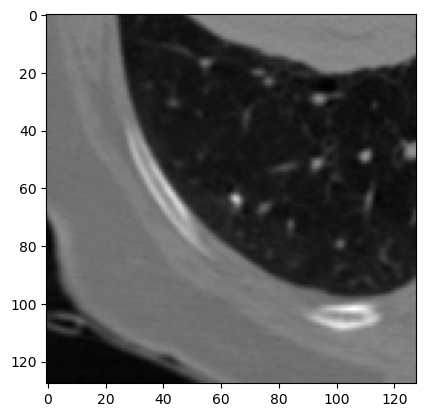

In [ ]:
images=[]
masks=[]
y=[]
gr_shape=(128,128,1)
img_shape = (128,128,3)
Thres = 1000
input_dir="/content/drive/MyDrive/LungCancer/Datasets/LIDC-IDRI-slices/"
out_dir = "/content/drive/MyDrive/LungCancer/ModelRun"
plt.imshow(img)
plt.show()

In [ ]:
np.asarray(img).shape

(128, 128, 3)

In [ ]:
np.array(images).shape

(0,)

In [ ]:
np.array(masks).shape

(0,)

In [ ]:
images=[]

y=[]
for nodule in os.listdir('/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001'):
        mask0=[]
        mask1=[]
        mask2=[]
        mask3=[]
        for filename in glob('/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001/'+nodule+'/images/*.png'):
            print(filename)
            img = image.load_img(filename,target_size=img_shape)
            img = np.asarray(img)
            images.append(img)
        for filename in glob('/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001/'+nodule+'/mask-0/*.png'):
            print(filename)
            img = image.load_img(filename,target_size=img_shape)
            img = np.asarray(img)
            mask0.append(img)
        for filename in glob('/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001/'+nodule+'/mask-1/*.png'):
            print(filename)
            img = image.load_img(filename,target_size=img_shape)
            img = np.asarray(img)
            mask1.append(img)
        for filename in glob('/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001/'+nodule+'/mask-2/*.png'):
            print(filename)
            img = image.load_img(filename,target_size=img_shape)
            img = np.asarray(img)
            mask2.append(img)
        for filename in glob('/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001/'+nodule+'/mask-3/*.png'):
            print(filename)
            img = image.load_img(filename,target_size=img_shape)
            img = np.asarray(img)
            mask3.append(img)

/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/images/slice-6.png
/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/images/slice-7.png
/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/images/slice-4.png
/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/images/slice-2.png
/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/images/slice-8.png
/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/images/slice-3.png
/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/images/slice-5.png
/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/images/slice-0.png
/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/images/slice-1.png
/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/mask-0/slice-6.png
/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/mask-0/slice-7.png
/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/mask-0/slice-4.png
/kag

In [ ]:
i=7
print(mask0[i].sum())
print(mask1[i].sum())
print(mask2[i].sum())
print(mask3[i].sum())


289935
0
102510
237915


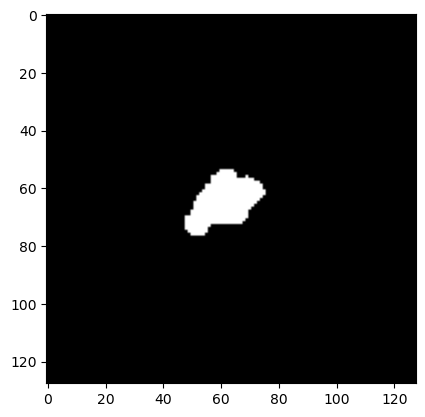

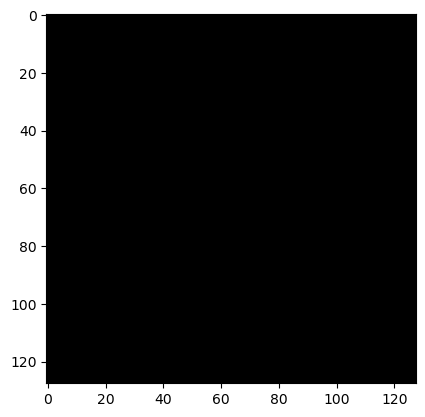

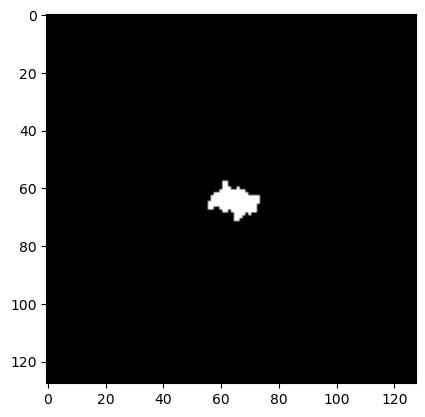

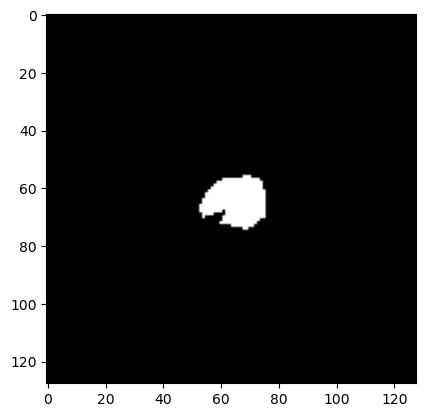

In [ ]:
plt.imshow(mask0[i])
plt.show()
plt.imshow(mask1[i])
plt.show()
plt.imshow(mask2[i])
plt.show()
plt.imshow(mask3[i])
plt.show()

In [ ]:
Thres = 100000

In [ ]:
gmask=[]
for i in range(len(mask0)):
    white_sum=np.array([mask0[i].sum(),mask1[i].sum(),mask2[i].sum(),mask3[i].sum()])
    cnt=int(mask0[i].sum()>Thres)+int(mask1[i].sum()>Thres)+int(mask2[i].sum()>Thres)+int(mask3[i].sum()>Thres)
    print(cnt)
    if(cnt>2):
        print("ID ="+str(white_sum.argmax()))
        print(white_sum)

4
ID =0
[515610 435285 481185 510255]
4
ID =0
[465885 230265 292995 364905]
4
ID =0
[694620 639540 635715 672435]
4
ID =0
[648720 572985 561510 562275]
0
4
ID =0
[710685 688500 684675 681615]
4
ID =0
[614295 563805 574515 596700]
3
ID =0
[289935      0 102510 237915]
4
ID =0
[577575 398565 457470 509490]


In [ ]:
gr_shape=(128,128,1)
img_shape = (128,128,3)
input_dir="/kaggle/input/lidcidri/LIDC-IDRI-slices"
images=[]
masks=[]
y=[]
Thres = 1000

In [ ]:
for patient in os.listdir(input_dir):
    for nodule in os.listdir(input_dir+'/'+patient):
        mask0=[]
        mask1=[]
        mask2=[]
        mask3=[]
        for filename in glob(input_dir+'/'+patient+'/'+nodule+'/images/*.png'):
            img = image.load_img(filename,target_size=img_shape)
            img = np.asarray(img)
            images.append(img)
        for filename in glob(input_dir+'/'+patient+'/'+nodule+'/mask-0/*.png'):
            img = image.load_img(filename,target_size=img_shape)
            img = np.asarray(img)
            mask0.append(img)
        for filename in glob(input_dir+'/'+patient+'/'+nodule+'/mask-1/*.png'):
            img = image.load_img(filename,target_size=img_shape)
            img = np.asarray(img)
            mask1.append(img)
        for filename in glob(input_dir+'/'+patient+'/'+nodule+'/mask-2/*.png'):
            img = image.load_img(filename,target_size=img_shape)
            img = np.asarray(img)
            mask2.append(img)
        for filename in glob(input_dir+'/'+patient+'/'+nodule+'/mask-3/*.png'):
            img = image.load_img(filename,target_size=img_shape)
            img = np.asarray(img)
            mask3.append(img)
        for i in range(len(mask0)):
            white_sum=np.array([mask0[i].sum(),mask1[i].sum(),mask2[i].sum(),mask3[i].sum()])
            cnt=int(mask0[i].sum()>Thres)+int(mask1[i].sum()>Thres)+int(mask2[i].sum()>Thres)+int(mask3[i].sum()>Thres)
            if(cnt>2):
                y.append(1)
                if white_sum.argmax()==0:
                    masks.append(mask0[i])
                elif white_sum.argmax()==1:
                    masks.append(mask1[i])
                elif white_sum.argmax()==2:
                    masks.append(mask2[i])
                else:
                    masks.append(mask3[i])
            else:
                y.append(0)
                if white_sum.argmin()==0:
                    masks.append(mask0[i])
                elif white_sum.argmin()==1:
                    masks.append(mask1[i])
                elif white_sum.argmin()==2:
                    masks.append(mask2[i])
                else:
                    masks.append(mask3[i])

In [ ]:
images=np.array(images)
masks=np.array(masks)
label=np.array(y)

In [ ]:
print(images.shape)
print(masks.shape)
print(label.shape)

(15548, 128, 128, 3)
(15548, 128, 128, 3)
(15548,)


In [ ]:
yy=pd.DataFrame(label)
yy.value_counts()

0    7992
1    7556
dtype: int64

In [ ]:
x_train,x_test,y_train,y_test,mask_train,mask_test = train_test_split(images,label,masks,train_size=0.8, random_state=7)
print(x_train.shape)
print(y_train.shape)

(12438, 128, 128, 3)
(12438,)


In [ ]:
x_train_added = np.vstack([x_train,x_test[:2000]])
y_train_added = np.concatenate((y_train,y_test[:2000]))

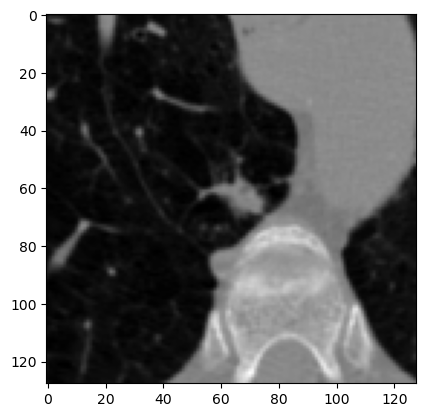

In [ ]:
plt.imshow(images[0])

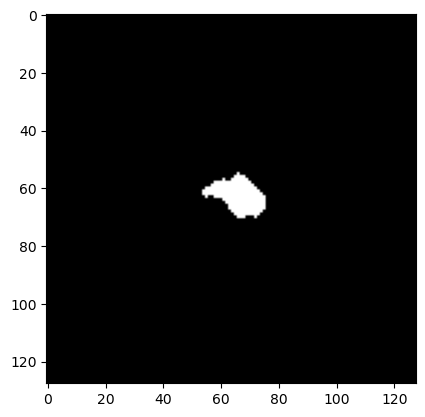

In [ ]:
plt.imshow(masks[0])

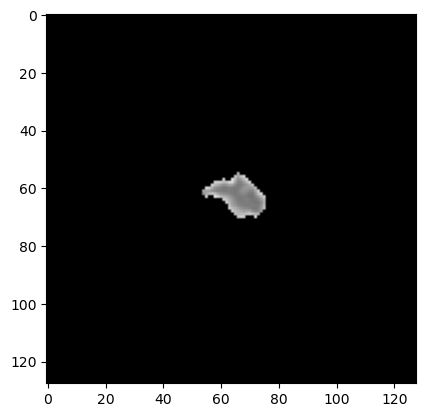

In [ ]:
plt.imshow(images[0]*masks[0])

In [ ]:
Name = "BilstmCNN"
inputs = tf.keras.Input(shape=img_shape, name="img")

reshaped_input = layers.Reshape((1,128,128,3))(inputs)
x1 = TimeDistributed(Conv2D(32,(3,3),activation='relu'))(reshaped_input)
x1 = TimeDistributed(MaxPooling2D(pool_size=(2,2)))(x1)
x1 = TimeDistributed(Conv2D(64,(3,3),activation='relu'))(x1)
x1 = TimeDistributed(MaxPooling2D(pool_size=(2,2)))(x1)
x1 = TimeDistributed(Conv2D(64,(3,3),activation='relu'))(x1)
x1 = TimeDistributed(MaxPooling2D(pool_size=(2,2)))(x1)
x1 = layers.Reshape((196,64))(x1)
x1 = Bidirectional(LSTM(64,return_sequences=True,dropout=0.3,recurrent_dropout=0.2))(x1)
x1 = Bidirectional(LSTM(64,dropout=0.3,recurrent_dropout=0.2))(x1)

outputs=Dense(1, activation='sigmoid')(x1)
model = keras.Model(inputs, outputs, name=Name)
print(model.summary())



Model: "BilstmCNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 128, 128, 3)]     0         
                                                                 
 reshape (Reshape)           (None, 1, 128, 128, 3)    0         
                                                                 
 time_distributed (TimeDistr  (None, 1, 126, 126, 32)  896       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 1, 63, 63, 32)    0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 1, 61, 61, 64)    18496     
 tributed)                                                       
                                                         

In [ ]:
model.compile(optimizer= 'adam',  loss=keras.losses.BinaryCrossentropy() , metrics=['acc',Recall(),Precision(),AUC(),TruePositives(),TrueNegatives(),FalseNegatives(),FalsePositives()])
plot_model(model, to_file=Name+'.png',show_shapes= True , show_layer_names=True)
history = model.fit(x_train_added, y_train_added, epochs=50, validation_data=(x_test, y_test), batch_size=64)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower left')
plt.savefig(Name+'acc.png')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig(Name+'loss.png')
plt.show()

model.save(Name+'.h5')
pd.DataFrame.from_dict(history.history).to_csv(Name+'.csv',index=False)


Epoch 1/50
226/226 [==============================] - 470s 2s/step - loss: 0.6962 - acc: 0.5017 - recall_2: 0.3492 - precision_2: 0.4817 - auc_2: 0.5006 - true_positives_2: 2447.0000 - true_negatives_2: 4797.0000 - false_negatives_2: 4561.0000 - false_positives_2: 2633.0000 - val_loss: 0.6924 - val_acc: 0.5193 - val_recall_2: 0.0013 - val_precision_2: 1.0000 - val_auc_2: 0.5025 - val_true_positives_2: 2.0000 - val_true_negatives_2: 1613.0000 - val_false_negatives_2: 1495.0000 - val_false_positives_2: 0.0000e+00
Epoch 2/50
226/226 [==============================] - 454s 2s/step - loss: 0.6939 - acc: 0.5125 - recall_2: 0.3579 - precision_2: 0.4970 - auc_2: 0.5090 - true_positives_2: 2508.0000 - true_negatives_2: 4892.0000 - false_negatives_2: 4500.0000 - false_positives_2: 2538.0000 - val_loss: 0.6920 - val_acc: 0.4923 - val_recall_2: 0.9833 - val_precision_2: 0.4865 - val_auc_2: 0.5020 - val_true_positives_2: 1472.0000 - val_true_negatives_2: 59.0000 - val_false_negatives_2: 25.0000 - v

KeyboardInterrupt: 